# seaborn 训练代码

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as s

In [2]:
sns.set()

In [8]:
sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


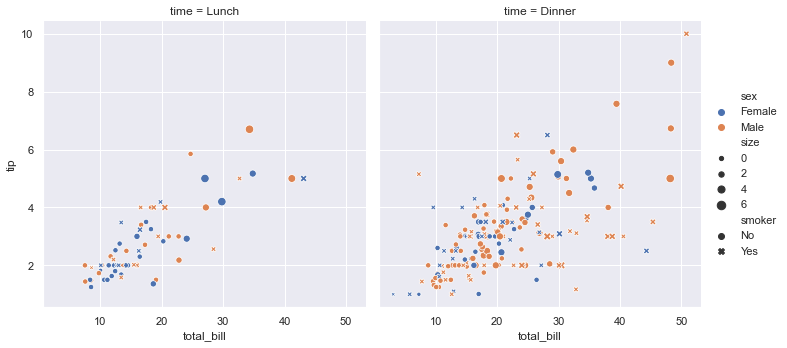

In [5]:
sns.relplot(x='total_bill', y='tip',
          col='time',hue='sex',
          style='smoker',size='size',data=tips')

In [3]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, bins=30, label=['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

NameError: name 'data' is not defined

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='day', ylabel='proportion'>

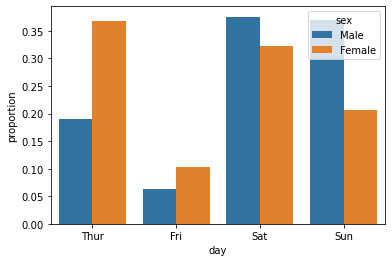

In [5]:

import seaborn as sns

df = sns.load_dataset("tips")
x, y, hue = "day", "proportion", "sex"
hue_order = ["Male", "Female"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))


In [6]:
df = sns.load_dataset("highvalue")
x, y, hue = "aon", "proportion", "churn_flag"
hue_order = ["churn", "non-churn"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "highvalue"), x=x, y=y, hue=hue))


ValueError: 'highvalue' is not one of the example datasets.

In [8]:
import pandas as pd
df=pd.DataFrame({'group':list("AADABCBCCCD"),'Values':[1,0,1,0,1,0,0,1,0,1,0]})
tempdf=df.groupby(['group','Values']).Values.count().unstack().fillna(0)
tempdf['total']=df['group'].value_counts()
tempdf['percent']=tempdf[0]/tempdf['total']*100

tempdf.reset_index(inplace=True)
print tempdf

sns.barplot(x='group',y='percent',data=tempdf)


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(tempdf)? (<ipython-input-8-465c3f47892f>, line 8)

/Users/liyunfan/opt/anaconda3/envs/ids/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


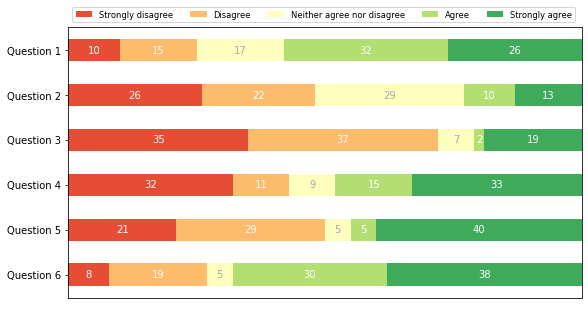

In [11]:
import numpy as np
import matplotlib.pyplot as plt

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    

    return fig, ax


survey(results, category_names)
plt.show()

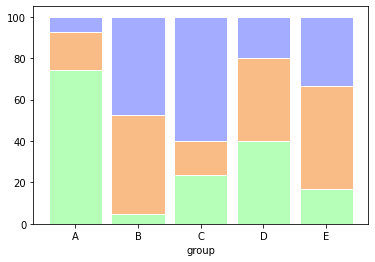

In [12]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")

# Show graphic
plt.show()

In [13]:
def percentage_bar(highvalue):
    labels = df.index.tolist() #提取分类显示标签
    results = df.to_dict(orient = 'list') #将数值结果转化为字典
    category_names = list(results.keys()) # 提取字典里面的类别（键-key）
    data = np.array(list(results.values())) #提取字典里面的数值（值-value）

    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[0])) 
    #设置占比显示的颜色，可以自定义，修改括号里面的参数即可，如下
	#category_colors = plt.get_cmap('hot')(np.linspace(0.15, 0.85, data.shape[0]))
	
	
    fig, ax = plt.subplots(figsize=(12, 9)) #创建画布，开始绘图
    ax.invert_xaxis()#这个可以通过设置df中columns的顺序调整
    ax.yaxis.set_visible(False) #设置y轴刻度不可见
    ax.set_xticklabels(labels=labels, rotation=90) #显示x轴标签，并旋转90度
    ax.set_ylim(0,1) #设置y轴的显示范围
    starts = 0  #绘制基准
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        heights = data[i,: ]/ data.sum(axis =0) #计算出每次遍历时候的百分比
        ax.bar(labels, heights, bottom=starts, width=0.5,label=colname, color=color,edgecolor ='gray') # 绘制柱状图
        xcenters = starts + heights/2  #进行文本标记位置的选定
        starts += heights  #核心一步，就是基于基准上的百分比累加
        #print(starts) 这个变量就是能否百分比显示的关键，可以打印输出看一下
        percentage_text = data[i,: ]/ data.sum(axis =0) #文本标记的数据
        
        r, g, b, _ = color  # 这里进行像素的分割
        text_color = 'white' if r * g * b < 0.5 else 'k'  #根据颜色基调分配文本标记的颜色
        for y, (x, c) in enumerate(zip(xcenters, percentage_text)):
            ax.text(y, x, f'{round(c*100,2)}%', ha='center', va='center',
                    color=text_color, rotation = 90) #添加文本标记
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large') #设置图例
    return fig, ax  #返回图像

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

KeyboardInterrupt: 